<a href="https://colab.research.google.com/github/MFS-code/MinecraftAI/blob/main/MinecraftMLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mobfolder = "/content/drive/MyDrive/minevision/classification2/"

In [ ]:
from fastai.vision.all import *

In [ ]:
fnames = get_image_files(mobfolder)
fnames

(#100) [Path('/content/drive/MyDrive/minevision/classification2/pigs/2022-07-04_21.05.54.png'),Path('/content/drive/MyDrive/minevision/classification2/pigs/2022-07-04_21.06.21.png'),Path('/content/drive/MyDrive/minevision/classification2/pigs/2022-07-04_21.06.05.png'),Path('/content/drive/MyDrive/minevision/classification2/pigs/2022-07-04_21.06.16.png'),Path('/content/drive/MyDrive/minevision/classification2/pigs/2022-07-04_21.06.45.png'),Path('/content/drive/MyDrive/minevision/classification2/pigs/2022-07-04_21.06.32.png'),Path('/content/drive/MyDrive/minevision/classification2/pigs/2022-07-04_21.06.29.png'),Path('/content/drive/MyDrive/minevision/classification2/pigs/2022-07-04_21.06.08.png'),Path('/content/drive/MyDrive/minevision/classification2/pigs/2022-07-04_21.06.25.png'),Path('/content/drive/MyDrive/minevision/classification2/pigs/2022-07-04_21.06.11.png')...]

In [ ]:
dls = ImageDataLoaders.from_path_func(path = mobfolder,
                                      fnames = fnames, 
                                      label_func = parent_label,
                                      item_tfms=Resize(224),
                                      valid_pct = 0.3,
                                      bs=3)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,1.002901,0.874328,0.433333,00:25
1,1.030003,0.579687,0.266667,00:24
2,0.906179,0.351595,0.133333,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.727327,0.226809,0.133333,00:35
1,0.621434,0.283110,0.100000,00:36
2,0.615976,0.319546,0.100000,00:36
3,0.502210,0.455110,0.133333,00:36
4,0.567307,0.469776,0.166667,00:36
5,0.577069,0.520369,0.233333,00:36
6,0.613142,0.127589,0.033333,00:37
7,0.537424,0.072818,0.033333,00:35
8,0.606211,0.104724,0.033333,00:35
9,0.560445,0.070749,0.000000,00:36


In [ ]:
learn.predict(fnames[0]), fnames[0]

(('pigs', TensorBase(1), TensorBase([0.2508, 0.7492])),
 Path('/content/drive/MyDrive/minevision/classification2/pigs/2022-07-04_21.05.54.png'))

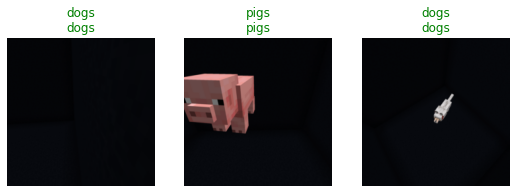

In [ ]:
learn.show_results()

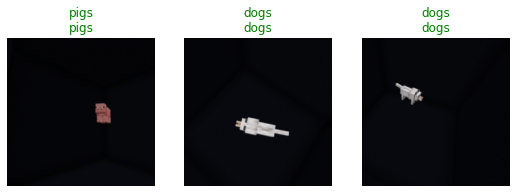

In [ ]:
learn.show_results(0) 

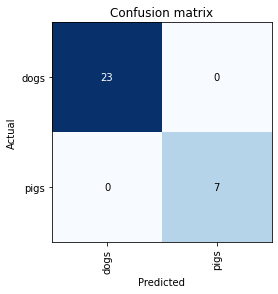

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused()

[]

In [ ]:
learn.export("export.pkl")

In [ ]:
learn.path

Path('/content/drive/MyDrive/minevision/classification2')

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

        dogs       1.00      1.00      1.00        23
        pigs       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
import torch
torch.save(learn.state_dict(), "minevision_cats_dogs.pth")

In [36]:
learn.state_dict()

OrderedDict([('0.0.weight',
              tensor([[[[ 5.4212e-03, -6.9165e-03,  7.8708e-03,  ...,  4.9043e-02,
                          3.0634e-02,  2.5368e-02],
                        [ 4.1120e-02,  3.1330e-02,  3.2270e-02,  ...,  3.3128e-02,
                          2.9762e-02,  4.1727e-02],
                        [ 5.0096e-03, -3.1651e-02, -6.1269e-02,  ..., -9.7459e-02,
                         -1.1595e-01, -1.2186e-01],
                        ...,
                        [-1.2257e-02, -2.4856e-02, -9.2944e-03,  ...,  1.7145e-02,
                          2.5208e-03,  1.6772e-02],
                        [ 3.9436e-03,  4.4498e-03,  3.6346e-02,  ...,  1.0378e-01,
                          7.4034e-02,  5.9132e-02],
                        [ 1.6824e-02,  8.9092e-03,  3.1368e-02,  ...,  9.7007e-02,
                          8.3783e-02,  9.7006e-02]],
              
                       [[-7.7112e-03, -8.7799e-03,  1.4128e-02,  ...,  3.3871e-02,
                          2.5455e-